# **PROJECT: CREDIT SCORING**

# **INFO**

**1. Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

**2. Data**

In [ ]:
df = pd.read_csv("german_credit_data.csv")
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [ ]:
#Preview data
df.head()

Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  Risk  
0           1169         6             radio/TV  good  
1           5951        48             radio/TV   bad  
2           2096        12            education  good  
3           7882        42  furniture/equipment  good  
4           4870        24                  car   bad

In [ ]:
df.tail()

Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
995         995   31  female    1     own          little              NaN   
996         996   40    male    3     own          little           little   
997         997   38    male    2     own          little              NaN   
998         998   23    male    2    free          little           little   
999         999   27    male    2     own        moderate         moderate   

     Credit amount  Duration              Purpose  Risk  
995           1736        12  furniture/equipment  good  
996           3857        30                  car  good  
997            804        12             radio/TV  good  
998           1845        45             radio/TV   bad  
999           4576        45                  car  good

**3. Dropping irrelevant columns**

In [ ]:
df = df.drop(columns=[col for col in df.columns if 'Unnamed' in col])

In [ ]:
df.head()

Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  
0         6             radio/TV  good  
1        48             radio/TV   bad  
2        12            education  good  
3        42  furniture/equipment  good  
4        24                  car   bad

# **1. Feature Classification: Categorical vs Numerical**

# **2. Data Understanding**

**Prepare data**

In [ ]:
# Target variable
#For the 'Credit Risk' column, '1' indicates a good credit score, and '2' a poor one.
df["Risk"] = df['Risk'].astype('category')

In [ ]:
# Features
categorical_features = ['Housing', 'Saving accounts', 'Checking account', 'Purpose']
numerical_features = ['Age', 'Job', 'Credit amount', 'Duration']

In [ ]:
#for feature in categorical_features:
 #df[feature] = df[feature].astype('category')

# 2.1. Dataset Overview

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


# 2.2. Descriptive Statistics

In [ ]:
#Xem thống kê mô tả cho các Numerical Features
df.describe()

Age          Job  Credit amount     Duration
count  1000.000000  1000.000000    1000.000000  1000.000000
mean     35.546000     1.904000    3271.258000    20.903000
std      11.375469     0.653614    2822.736876    12.058814
min      19.000000     0.000000     250.000000     4.000000
25%      27.000000     2.000000    1365.500000    12.000000
50%      33.000000     2.000000    2319.500000    18.000000
75%      42.000000     2.000000    3972.250000    24.000000
max      75.000000     3.000000   18424.000000    72.000000

In [ ]:
# Xem thống kê mô tả cho các Categorical Features
df.describe(include='category')

Housing Saving accounts Checking account Purpose  Risk
count     1000             817              606    1000  1000
unique       3               4                3       8     2
top        own          little           little     car  good
freq       713             603              274     337   700

# **3. Exploration Data Analysis (EDA)**

# 3.1. EDA for Target variable

In [ ]:
# xem số lượng
df['Risk'].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [ ]:
# tỷ lệ
df['Risk'].value_counts(normalize=True)

Risk
good    0.7
bad     0.3
Name: proportion, dtype: float64

<Axes: xlabel='Risk', ylabel='count'>

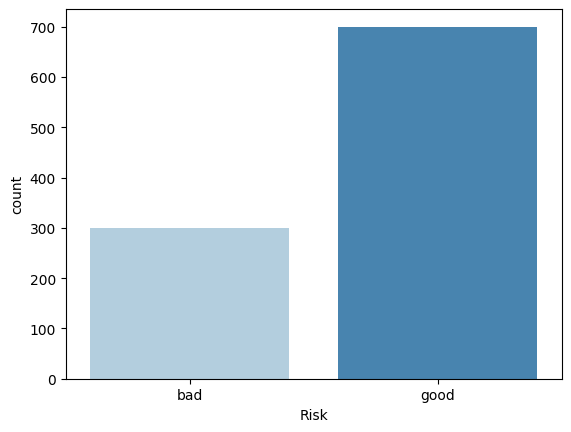

In [ ]:
sns.countplot(data=df, x='Risk', palette = 'Blues')

<details>
<summary><strong> Insight: </strong></summary>

*   1: Có tần suất cao hơn nhiều -> tỷ lệ rủi ro thấp
*   Dữ liệu có sự mất cân bằng -> nhóm 1 gấp 2 lần nhóm 2.
</details>

# 3.2. EDA for Categorical Features

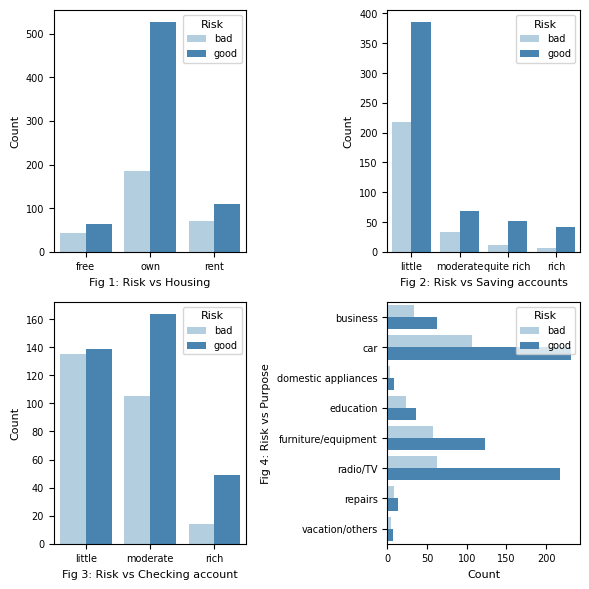

In [ ]:
columns = ['Housing', 'Saving accounts', 'Checking account', 'Purpose']
n_rows = 2
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 3))

for r in range(n_rows):
    for c in range(n_cols):
        i = r * n_cols + c
        if i < len(columns):
            ax_i = axes[r][c]

            if columns[i] == 'Purpose':

                sns.countplot(data=df, y=columns[i], hue='Risk', ax=ax_i, palette='Blues')
                ax_i.set_ylabel(f"Fig {i+1}: Risk vs {columns[i]}", fontsize=8)
                ax_i.set_xlabel("Count", fontsize=8)
                ax_i.tick_params(axis='y', labelsize=7)
                ax_i.tick_params(axis='x', labelsize=7)
            else:
                sns.countplot(data=df, x=columns[i], hue='Risk', ax=ax_i, palette='Blues')
                ax_i.set_xlabel(f"Fig {i+1}: Risk vs {columns[i]}", fontsize=8)
                ax_i.set_ylabel("Count", fontsize=8)
                ax_i.tick_params(axis='x', labelrotation=0, labelsize=7)
                ax_i.tick_params(axis='y', labelsize=7)

            ax_i.legend(title='Risk', loc='upper right', fontsize=7, title_fontsize=8)

plt.tight_layout()
plt.show()


**Nhận xét:**

<details>
<summary><strong>Fig 1: Credit Risk rate vs Housing</strong></summary>

- Chiếm đa số người sở hữu nhà sẽ có rủi ro cao và tỷ lệ tín dụng tốt cao nhất.
-  "free" < "rent" và có phân bố rủi ro tương đối gần nhau

</details>

<details>
<summary><strong>Fig 2: Credit Risk rate vs Saving accounts</strong></summary>

- "little" tiết kiệm chiếm phần lớn và nhóm 1 gần 2 lần nhóm 2
- 3 nhóm còn lại có xu hướng nghiêng về Credit Risk = 1

</details>

<details>
<summary><strong>Fig 3: Credit Risk rate vs Checking accounts</strong></summary>

- Phân bố tương đối đồng đều.
- Nhóm "rich" có rate nhỏ nhất.

</details>

<details>
<summary><strong>Fig 4: Credit Risk rate vs Purose</strong></summary>

- "car" và "radio/TV" là 2 mục đích vay phổ biến nhất.
- Nhóm 2 > nhóm 2 all mục

</details>


# 3.3. EDA for Numerical Features

<Axes: xlabel='Age', ylabel='Count'>

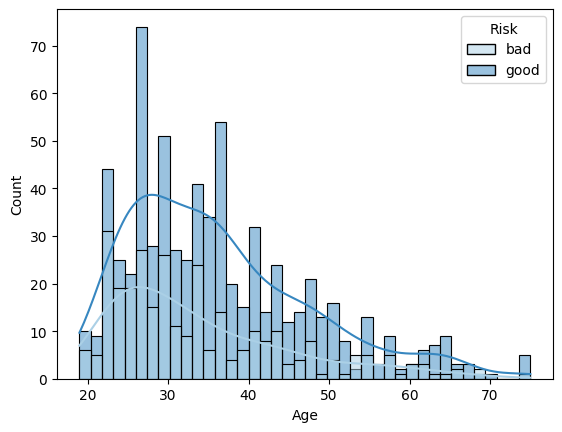

In [ ]:
sns.histplot(data=df, x='Age', hue='Risk', bins = 40, kde = True, palette = 'Blues')

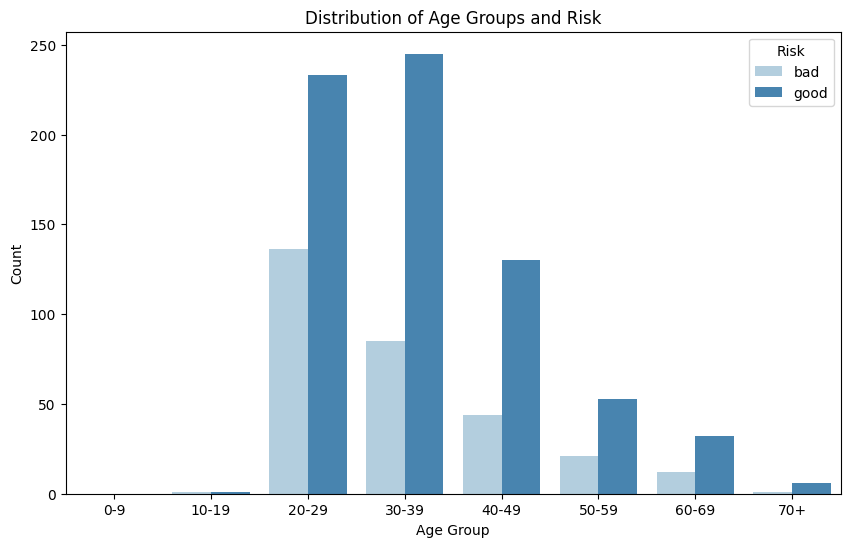

In [ ]:
# Chia dữ liệu 'Age' thành các nhóm tuổi
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Vẽ biểu đồ countplot cho nhóm tuổi và tỷ lệ rủi ro
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='AgeGroup', hue='Risk', palette='Blues')
plt.title('Distribution of Age Groups and Risk')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

<details>
<summary><strong> Insight: </strong></summary>

- Phần lớn khách hàng từ 20-49 tuổi
- Tỷ lệ có điểm tín dụng tốt cao hơn

</details>

<Axes: xlabel='Job', ylabel='Count'>

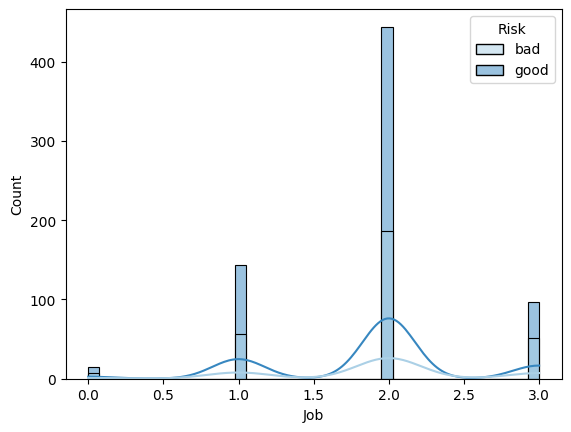

In [ ]:
sns.histplot(data=df, x='Job', hue='Risk', bins = 40, kde = True, palette = 'Blues')

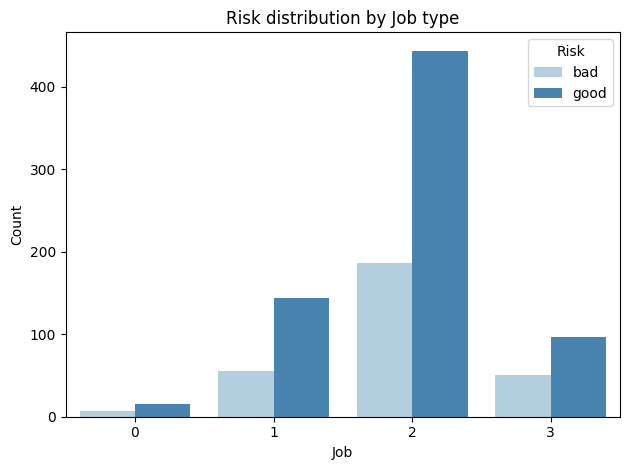

In [ ]:
sns.countplot(data=df, x='Job', hue='Risk', palette='Blues')
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Risk distribution by Job type')
plt.legend(title='Risk')
plt.tight_layout()
plt.show()

<details>
<summary><strong> Insight: </strong></summary>

- Phần lớn là người làm 2 việc
- Tỷ lệ tín dụng tốt cao nhất

</details>

<Axes: xlabel='Credit amount', ylabel='Count'>

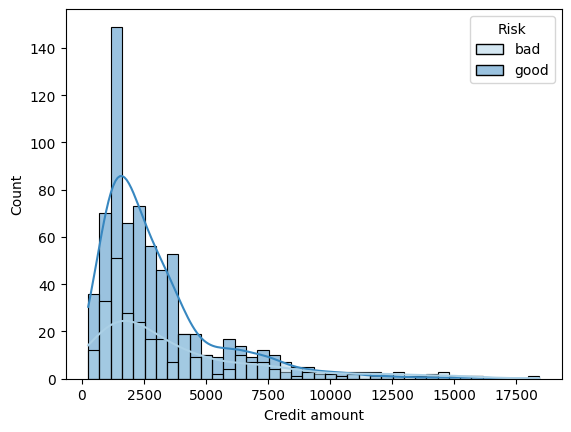

In [ ]:
sns.histplot(data=df, x='Credit amount', hue='Risk', bins = 40, kde = True, palette = 'Blues')

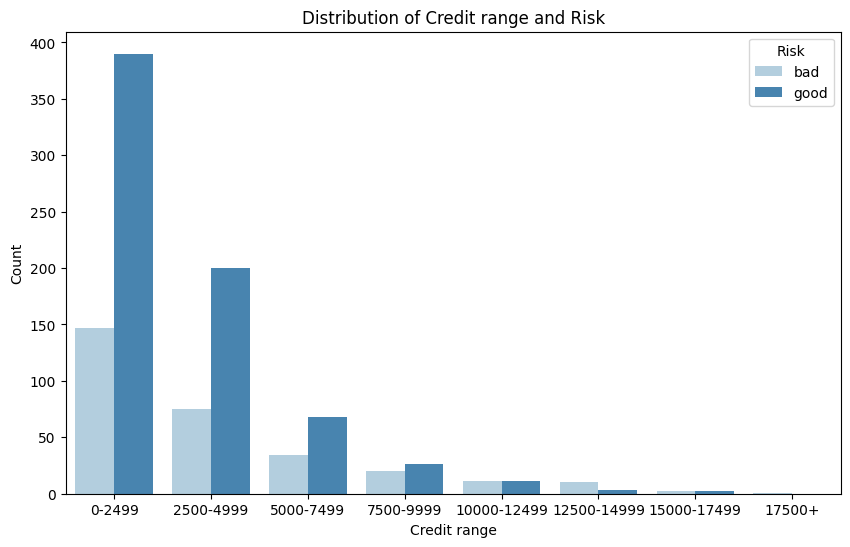

In [ ]:
bins = [0, 2500, 5000, 7500, 10000, 12500, 15000, 17500, np.inf]
labels = ['0-2499', '2500-4999', '5000-7499', '7500-9999', '10000-12499', '12500-14999', '15000-17499', '17500+']
df['Credit range'] = pd.cut(df['Credit amount'], bins=bins, labels=labels, right=False)

# Vẽ biểu đồ countplot cho nhóm tín dụng và tỷ lệ rủi ro
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Credit range', hue='Risk', palette='Blues')
plt.title('Distribution of Credit range and Risk')
plt.xlabel('Credit range')
plt.ylabel('Count')
plt.show()

<details>
<summary><strong> Insight: </strong></summary>

- Phần lớn nằm trong khoảng 0-49999
- Khoảng 0-2499 có tỷ lệ điểm tín dụng cao nhất

</details>

<Axes: xlabel='Duration', ylabel='Count'>

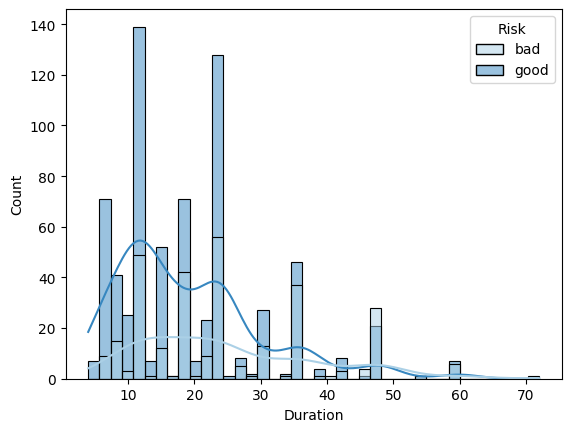

In [ ]:
sns.histplot(data=df, x='Duration', hue='Risk', bins = 40, kde = True, palette = 'Blues')

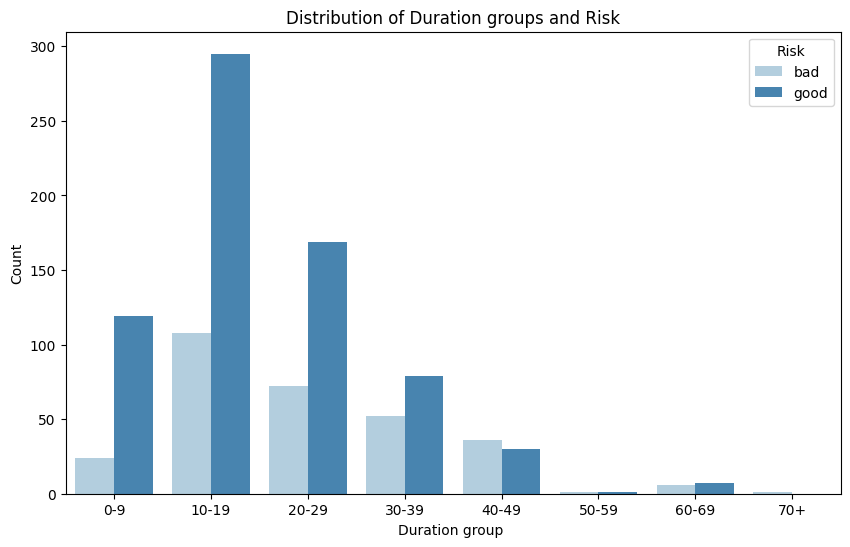

In [ ]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, np.inf]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59','60-69', '70+']
df['Durationgroup'] = pd.cut(df['Duration'], bins=bins, labels=labels, right=False)

# Vẽ biểu đồ countplot cho nhóm tín dụng và tỷ lệ rủi ro
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Durationgroup', hue='Risk', palette='Blues')
plt.title('Distribution of Duration groups and Risk')
plt.xlabel('Duration group ')
plt.ylabel('Count')
plt.show()

<details>
<summary><strong> Insight: </strong></summary>

- Phần lớn nằm trong khoảng 10-29
- Khoảng thời gian từ 10-19 có tỷ lệ điểm tín dụng cao nhất

</details>

# **4. Feature Engineering & Data Wrangling**

# 4.1. Feature Engineering

**Purpose**

In [ ]:
df["Purpose"].head()

0               radio/TV
1               radio/TV
2              education
3    furniture/equipment
4                    car
Name: Purpose, dtype: category
Categories (8, object): ['business', 'car', 'domestic appliances', 'education',
                         'furniture/equipment', 'radio/TV', 'repairs', 'vacation/others']

In [ ]:
df['Purpose_cleaned'] = df['Purpose'].str.split('[,/]').str[0].str.strip()
df['Purpose_cleaned'].value_counts()

Purpose_cleaned
car                    337
radio                  280
furniture              181
business                97
education               59
repairs                 22
domestic appliances     12
vacation                12
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Purpose_cleaned'>

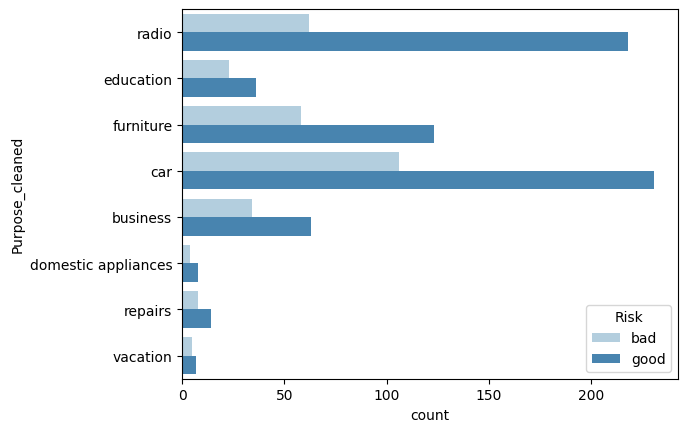

In [ ]:
sns.countplot(data=df, y='Purpose_cleaned', hue='Risk', palette = 'Blues')

# 4.2. Data Wrangling

Chuyển dữ liệu thô thành dữ liệu sẵn sàng cho việc phân tích

In [ ]:
num_features = ['Age', 'Job', 'Credit amount', 'Duration']
cat_features = ['Housing', 'Saving accounts', 'Checking account', 'Purpose_cleaned']
features_cols = num_features + cat_features
features_cols

['Age',
 'Job',
 'Credit amount',
 'Duration',
 'Housing',
 'Saving accounts',
 'Checking account',
 'Purpose_cleaned']

In [ ]:
# check missing values
for col in features_cols:
  missing_count = df[col].isnull().sum()
  if missing_count > 0:
    print(f"{col} : {missing_count} missing values")

Saving accounts : 183 missing values
Checking account : 394 missing values


**Filling missing values (Saving accounts, Checking account)**

In [ ]:
df['Saving accounts'] = df.groupby('Risk')['Saving accounts']\
                          .transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'unknown'))

df['Checking account'] = df.groupby('Risk')['Checking account']\
                            .transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'unknown'))
print(df['Saving accounts'].isna().sum())
print(df['Checking account'].isna().sum())

0
0


**Outliers**

In [ ]:
def cap_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower,
              np.where(df[col] > upper, upper, df[col]))
    return df

# Áp dụng cho các cột số
for col in ['Age','Job', 'Credit amount', 'Duration']:
    df = cap_outliers_iqr(df, col)

# **Preprocessing data**

In [ ]:
# preorocess pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [ ]:
num_features = ['Age', 'Job', 'Credit amount', 'Duration']
cat_features = ['Housing', 'Saving accounts', 'Checking account', 'Purpose_cleaned']

In [ ]:
num_tranformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # strategy = {'most_frequent', 'median', 'mean', 'constant'}
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('num_features', num_tranformer, num_features),
    ('cat_features', cat_transformer, cat_features)
])

In [ ]:
X = df[features_cols]
y = df['Risk']

In [ ]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num_features',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Job', 'Credit amount', 'Duration']),
                                ('cat_features',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Housing', 'Saving accounts',
                                  'Checking account', 'Purpose_cleaned'])])

In [ ]:
X = preprocessor.transform(X)

# **5. Model Training**

In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20, stratify=y)

sm = SMOTE(random_state=20)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Trước SMOTE:")
print(y_train.value_counts())
print("\nSau SMOTE:")
print(y_train_res.value_counts())

Trước SMOTE:
Risk
good    560
bad     240
Name: count, dtype: int64

Sau SMOTE:
Risk
bad     560
good    560
Name: count, dtype: int64


# 5.1. Phân chia dữ liệu (train-test) - (Đơn giản)

**Bước 1. Dữ liệu được chia thành train và test**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)
X_train.shape, X_test.shape

((800, 22), (200, 22))

**Bước 2: Chọn mô hình và đánh giá**

# K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
seed = 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Train
print("KNN - Training:")
y_train_pred = knn.predict(X_train)
print(classification_report(y_train, y_train_pred))
# Test
print("KNN - Testing:")
y_test_pred = knn.predict(X_test)
print(classification_report(y_test, y_test_pred))

KNN - Training:
              precision    recall  f1-score   support

         bad       0.71      0.45      0.55       227
        good       0.81      0.93      0.87       573

    accuracy                           0.79       800
   macro avg       0.76      0.69      0.71       800
weighted avg       0.78      0.79      0.78       800

KNN - Testing:
              precision    recall  f1-score   support

         bad       0.74      0.44      0.55        73
        good       0.74      0.91      0.82       127

    accuracy                           0.74       200
   macro avg       0.74      0.68      0.68       200
weighted avg       0.74      0.74      0.72       200



# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
seed = 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)
dt = DecisionTreeClassifier(max_depth=4, random_state=20, class_weight='balanced')
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=20)

In [ ]:
# Train
print("Decision Tree - Training:")
y_train_pred = dt.predict(X_train)
print(classification_report(y_train, y_train_pred))

# Test
print("Decision Tree - Testing:")
y_test_pred = dt.predict(X_test)
print(classification_report(y_test, y_test_pred))

Decision Tree - Training:
              precision    recall  f1-score   support

         bad       0.56      0.67      0.61       227
        good       0.86      0.79      0.82       573

    accuracy                           0.76       800
   macro avg       0.71      0.73      0.72       800
weighted avg       0.77      0.76      0.76       800

Decision Tree - Testing:
              precision    recall  f1-score   support

         bad       0.76      0.70      0.73        73
        good       0.83      0.87      0.85       127

    accuracy                           0.81       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.81      0.81      0.81       200



# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100,max_depth=5,min_samples_split=10,min_samples_leaf=5,class_weight='balanced', random_state=20)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=5,
                       min_samples_split=10, random_state=20)

In [ ]:
# Train
print("Random Forest - Training:")
y_train_pred = rf.predict(X_train)
print(classification_report(y_train, y_train_pred))

# Test
print("Random Forest - Testing:")
y_test_pred = rf.predict(X_test)
print(classification_report(y_test, y_test_pred))

Random Forest - Training:
              precision    recall  f1-score   support

         bad       0.57      0.72      0.64       227
        good       0.88      0.79      0.83       573

    accuracy                           0.77       800
   macro avg       0.72      0.75      0.73       800
weighted avg       0.79      0.77      0.77       800

Random Forest - Testing:
              precision    recall  f1-score   support

         bad       0.69      0.73      0.71        73
        good       0.84      0.81      0.82       127

    accuracy                           0.78       200
   macro avg       0.76      0.77      0.77       200
weighted avg       0.78      0.78      0.78       200



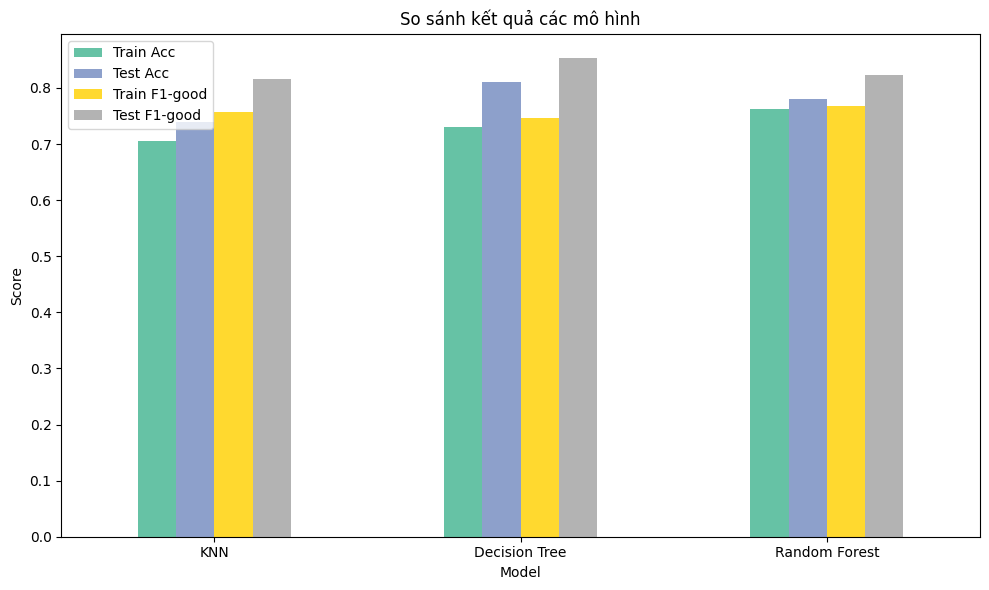

In [ ]:
models = {'KNN': knn, 'Decision Tree': dt, 'Random Forest': rf}
results = []

# Get the class labels from y_test
class_labels = y_test.cat.categories

for name, model in models.items():
    y_train_pred = model.predict(X_train_res)
    y_test_pred = model.predict(X_test)
    train_report = classification_report(y_train_res, y_train_pred, output_dict=True, zero_division=0)
    test_report = classification_report(y_test, y_test_pred, output_dict=True, zero_division=0)

    results.append([
        name,
        accuracy_score(y_train_res, y_train_pred),
        accuracy_score(y_test, y_test_pred),
        train_report['good']['f1-score'],
        test_report['good']['f1-score']
    ])

df = pd.DataFrame(results, columns=['Model', 'Train Acc', 'Test Acc', 'Train F1-good', 'Test F1-good'])

# Vẽ biểu đồ
df.set_index('Model').plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title('So sánh kết quả các mô hình')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# **German Credit Data Classification with XAI**

In [ ]:
# Step 1: Load and Explore Dataset
import pandas as pd
import numpy as np

df = pd.read_csv("german_credit_data.csv")
df.head()

Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  Risk  
0           1169         6             radio/TV  good  
1           5951        48             radio/TV   bad  
2           2096        12            education  good  
3           7882        42  furniture/equipment  good  
4           4870        24                  car   bad

In [ ]:
# Step 2: Data Preprocessing
df = df.drop(columns=[col for col in df.columns if 'Unnamed' in col])

#df['Risk'] = df['Risk'].map({'good': 1, 'bad': 0})

categorical_cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
df[categorical_cols] = df[categorical_cols].fillna("unknown")
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df.head()

Age  Job  Credit amount  Duration  Risk  Sex_male  Housing_own  \
0   67    2           1169         6  good      True         True   
1   22    2           5951        48   bad     False         True   
2   49    1           2096        12  good      True         True   
3   45    2           7882        42  good      True        False   
4   53    2           4870        24   bad      True        False   

   Housing_rent  Saving accounts_moderate  Saving accounts_quite rich  ...  \
0         False                     False                       False  ...   
1         False                     False                       False  ...   
2         False                     False                       False  ...   
3         False                     False                       False  ...   
4         False                     False                       False  ...   

   Checking account_moderate  Checking account_rich  Checking account_unknown  \
0                      False                  False                     False   
1                       True                  False                     False   
2                      False                  False                      True   
3                      False                  False                     False   
4                      False                  False                     False   

   Purpose_car  Purpose_domestic appliances  Purpose_education  \
0        False                        False              False   
1        False                        False              False   
2        False                        False               True   
3        False                        False              False   
4         True                        False              False   

   Purpose_furniture/equipment  Purpose_radio/TV  Purpose_repairs  \
0                        False              True            False   
1                        False              True            False   
2                        False             False            False   
3                         True             False            False   
4                        False             False            False   

   Purpose_vacation/others  
0                    False  
1                    False  
2                    False  
3                    False  
4                    False  

[5 rows x 22 columns]

In [ ]:
# Step 3: Train-Test Split
from sklearn.model_selection import train_test_split

X = df.drop("Risk", axis=1)
y = df["Risk"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Step 4: Train Classification Model (Random Forest)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bad       0.66      0.52      0.58        60
        good       0.81      0.89      0.85       140

    accuracy                           0.78       200
   macro avg       0.74      0.70      0.71       200
weighted avg       0.77      0.78      0.77       200



## XAI: LIME

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=479497ca6fd5b3b645833c4fad3f3eb8a27daff9414fe850148cee06d3883956
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
# Step 5.1: LIME Explanation
import lime
import lime.lime_tabular

explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values, feature_names=X_train.columns, class_names=['Bad', 'Good'], discretize_continuous=True)

for i in [0, 1, 2]:
    exp = explainer.explain_instance(X_test.values[i], model.predict_proba, num_features=10)
    exp.show_in_notebook(show_table=True)

## XAI: Decision Tree Surrogate
Model & Visualize

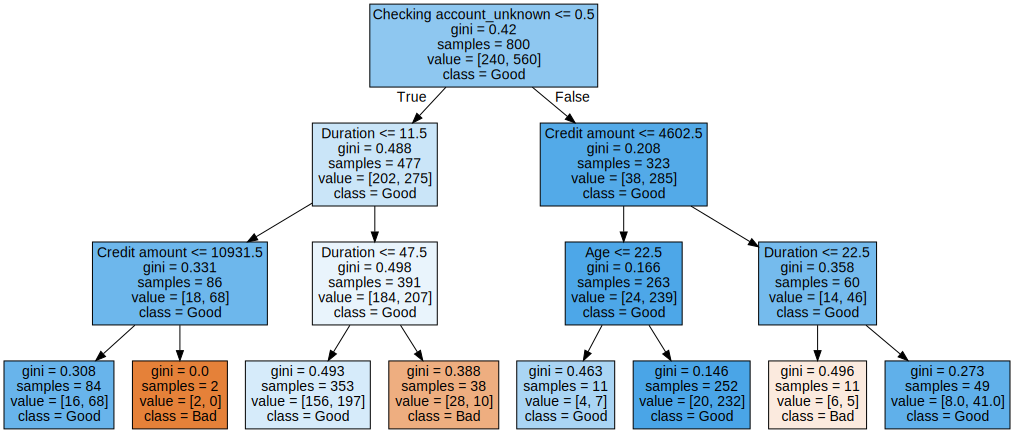

In [ ]:
# Step 5.3: Decision Tree Surrogate
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Train Decision Tree Surrogate
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, model.predict(X_train))

# Visualize Decision Tree
dot_data = export_graphviz(dt, out_file=None, feature_names=X_train.columns,
                           class_names=['Bad', 'Good'], filled=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
from sklearn.tree import _tree

def explain_decision_short(tree_model, X_instance, feature_names, class_names):
    tree_ = tree_model.tree_
    feature = tree_.feature
    threshold = tree_.threshold

    node_indicator = tree_model.decision_path([X_instance])
    leaf_id = tree_model.apply([X_instance])

    explanation = []

    for node_id in node_indicator.indices:
        if leaf_id[0] == node_id:
            continue  # Skip leaf
        feature_name = feature_names[feature[node_id]]
        threshold_val = threshold[node_id]
        feature_val = X_instance[feature[node_id]]

        if feature_val <= threshold_val:
            explanation.append(f"{feature_name} = {feature_val} (≤ {threshold_val})")
        else:
            explanation.append(f"{feature_name} = {feature_val} (> {threshold_val})")

    # Kết luận
    final_pred = tree_model.predict([X_instance])[0]
    summary = "; ".join(explanation)
    print("Explain: ")
    print(f" → Because:\t[{summary}]. \n → Decision:\t[{final_pred}].\n")
    print("-" * 80)

In [ ]:
# Giải thích 3 ví dụ:
for i in [0, 1, 2]:
    print(f"🔍 Ví dụ {i+1}:")
    display(X_test.iloc[i].to_frame().T)
    rf_pred = model.predict([X_test.iloc[i]])[0]
    dt_pred = dt.predict([X_test.iloc[i]])[0]
    print(f"True Label: {y_test.iloc[i]}")
    print(f"Random Forest Prediction: {rf_pred}")
    print(f"Surrogate Tree Prediction: {dt_pred}")

    explain_decision_short(dt, X_test.iloc[i].values, X_test.columns, class_names=dt.classes_)

🔍 Ví dụ 1:


Age Job Credit amount Duration Sex_male Housing_own Housing_rent  \
977  42   2          2427       18     True        True        False   

    Saving accounts_moderate Saving accounts_quite rich Saving accounts_rich  \
977                    False                      False                False   

     ... Checking account_moderate Checking account_rich  \
977  ...                      True                 False   

    Checking account_unknown Purpose_car Purpose_domestic appliances  \
977                    False       False                       False   

    Purpose_education Purpose_furniture/equipment Purpose_radio/TV  \
977             False                       False            False   

    Purpose_repairs Purpose_vacation/others  
977           False                   False  

[1 rows x 21 columns]

True Label: good
Random Forest Prediction: good
Surrogate Tree Prediction: good
Explain: 
 → Because:	[Checking account_unknown = False (≤ 0.5); Duration = 18 (> 11.5); Duration = 18 (≤ 47.5)]. 
 → Decision:	[good].

--------------------------------------------------------------------------------
🔍 Ví dụ 2:


Age Job Credit amount Duration Sex_male Housing_own Housing_rent  \
735  29   0          3990       36    False        True        False   

    Saving accounts_moderate Saving accounts_quite rich Saving accounts_rich  \
735                    False                      False                False   

     ... Checking account_moderate Checking account_rich  \
735  ...                      True                 False   

    Checking account_unknown Purpose_car Purpose_domestic appliances  \
735                    False       False                        True   

    Purpose_education Purpose_furniture/equipment Purpose_radio/TV  \
735             False                       False            False   

    Purpose_repairs Purpose_vacation/others  
735           False                   False  

[1 rows x 21 columns]

True Label: good
Random Forest Prediction: good
Surrogate Tree Prediction: good
Explain: 
 → Because:	[Checking account_unknown = False (≤ 0.5); Duration = 36 (> 11.5); Duration = 36 (≤ 47.5)]. 
 → Decision:	[good].

--------------------------------------------------------------------------------
🔍 Ví dụ 3:


Age Job Credit amount Duration Sex_male Housing_own Housing_rent  \
615  48   3         12204       48     True        True        False   

    Saving accounts_moderate Saving accounts_quite rich Saving accounts_rich  \
615                    False                      False                False   

     ... Checking account_moderate Checking account_rich  \
615  ...                      True                 False   

    Checking account_unknown Purpose_car Purpose_domestic appliances  \
615                    False       False                       False   

    Purpose_education Purpose_furniture/equipment Purpose_radio/TV  \
615             False                       False            False   

    Purpose_repairs Purpose_vacation/others  
615           False                   False  

[1 rows x 21 columns]

True Label: good
Random Forest Prediction: good
Surrogate Tree Prediction: bad
Explain: 
 → Because:	[Checking account_unknown = False (≤ 0.5); Duration = 48 (> 11.5); Duration = 48 (> 47.5)]. 
 → Decision:	[bad].

--------------------------------------------------------------------------------


# **XAI : SHAP**

In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

Selected SHAP values for 'good' class with shape: (200, 21)

Attempting to generate summary plot...


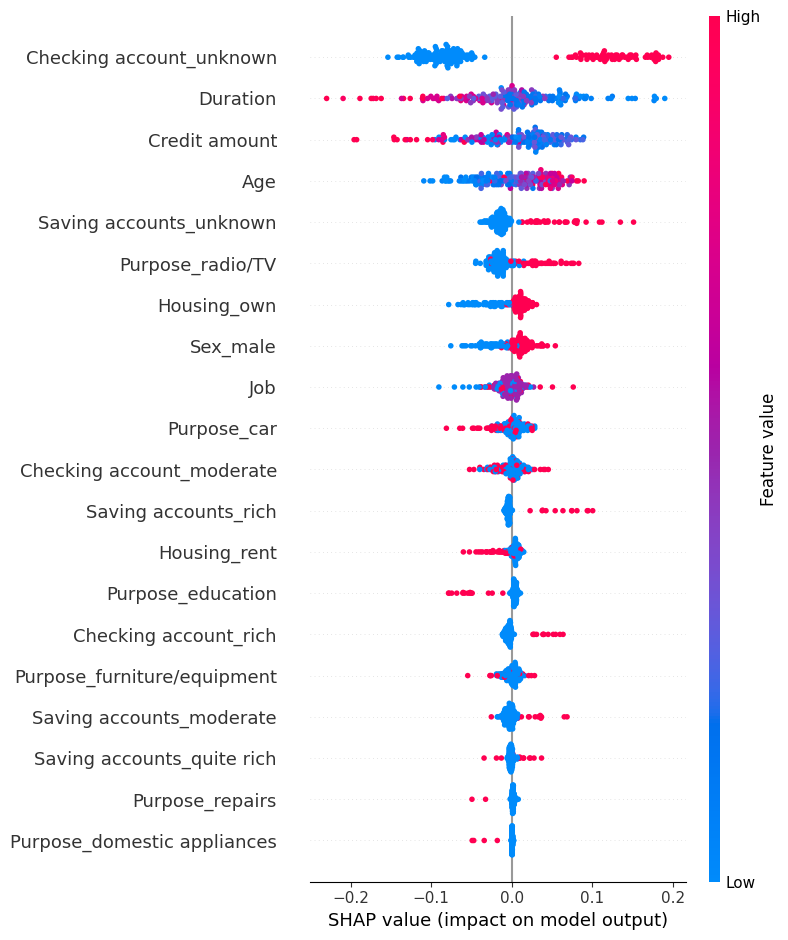

In [ ]:
# Recompute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Select SHAP values for the 'good' class by slicing the 3D array
# Assuming 'good' is the second class in the model's classes_ attribute (index 1)
if isinstance(shap_values, np.ndarray) and shap_values.ndim == 3:
    # Check if the last dimension size matches the number of classes
    if shap_values.shape[2] == len(model.classes_):
        # Find the index of the 'good' class
        try:
            good_class_index = list(model.classes_).index('good')
            shap_values_good = shap_values[:, :, good_class_index]
            print(f"Selected SHAP values for 'good' class with shape: {shap_values_good.shape}")

            # Now, attempt to generate the summary plot
            if shap_values_good.shape == X_test.shape:
                print("\nAttempting to generate summary plot...")
                shap.summary_plot(shap_values_good, X_test, feature_names=X_test.columns.tolist())
                plt.show()
            else:
                print("\nShape mismatch still exists after slicing. Cannot generate summary plot.")
                print(f"Expected shape: {X_test.shape}, Observed shape: {shap_values_good.shape}")
        except ValueError:
            print("\n'good' class not found in model.classes_.")
            print("Model classes:", model.classes_)
    else:
        print(f"\nUnexpected shape for shap_values: {shap_values.shape}. Last dimension does not match number of classes ({len(model.classes_)}).")
else:
    print("\nshap_values is not a 3D NumPy array as expected after recomputation.")